# 聚类


# 1、层次聚类

In [1]:
#导入相应的包
import scipy
import scipy.cluster.hierarchy as sch 
from scipy.cluster.vq import vq,kmeans,whiten
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA#主成分分析

In [2]:
%matplotlib inline

In [3]:
#导入数据
orgData = pd.read_csv('data/cities_10.csv', index_col="AREA", encoding='gbk')#中文格式有gbk和utf-8
orgData.head()
#orgData.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
AREA,,,,,,,,,
辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [4]:
#标准化
x_scaled = preprocessing.scale(orgData+0.0)
#标准化，但是只能用于浮点类型变量preprocessing.scale?preprocessing.StandardScaler(）
pd.DataFrame(x_scaled).head()

,0,1,2,3,4,5,6,7,8
0,-0.375748,-0.335897,-0.570700,-0.331801,-0.435115,-0.686087,-0.138827,-0.449589,-0.360085
1,1.199240,-0.483152,1.144732,0.984558,0.799910,0.865054,0.664019,-0.278096,0.349766
2,-0.184465,-0.764857,-0.546094,-0.468842,-0.631008,-0.491085,-0.391025,-0.602244,-0.688539
3,-1.438442,0.648116,-1.017166,-1.404990,-1.212338,-1.164573,-1.283762,-0.465286,-1.128613
4,1.225934,-0.184302,1.172001,1.080603,0.839647,1.067215,0.693490,0.062534,0.462736


In [6]:
#变量压缩
pca=PCA(n_components=2)
newData=pca.fit_transform(x_scaled)
pca.explained_variance_ratio_ 

array([0.80112955, 0.12214932])

In [7]:
newData

array([[-1.18945132, -0.31092235],
       [ 2.06415695, -0.74854414],
       [-1.43769023, -0.80669682],
       [-3.23039706,  0.84519783],
       [ 2.36892693, -0.44480961],
       [ 0.28997221,  2.79266758],
       [ 1.2099519 , -0.00638496],
       [-2.09689459, -0.22796377],
       [ 5.50091159, -0.14275827],
       [-3.47948639, -0.94978548]])

In [8]:
sch.linkage?

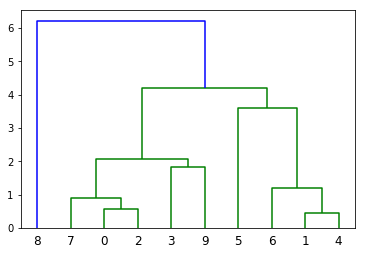

In [9]:
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(newData,'euclidean') #sch层次聚类,生成点与点之间的距离矩阵,这里用的欧氏距离
#进行层次聚类:

# AgglomerativeClustering: 使用自底向上的聚类方法。
# 主要有三种聚类准则：
# complete(maximum) linkage: 两类间的距离用最远点距离表示。
# avarage linkage:平均距离。
# ward's method: 以组内平方和最小，组间平方和最大为目的。
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.png
P=sch.dendrogram(Z)#dendrogram树状图
# plt.show()
plt.savefig('plot_dendrogram1.png')

In [11]:
disMat# 个数为 10行（无论几个指标）两两距离 10*9/2

array([3.28290719, 0.55445008, 2.34564989, 3.56089617, 3.43816294,
       2.41865227, 0.91122742, 6.692476  , 2.37747907, 3.50233   ,
       5.52922379, 0.43027829, 3.96079688, 1.13157701, 4.19348946,
       3.48973623, 5.5472948 , 2.43773537, 3.8237804 , 3.99252321,
       2.76595516, 0.87720142, 6.9702948 , 2.04680383, 5.74600282,
       4.02313786, 4.52127108, 1.56093039, 8.78702498, 1.81218392,
       3.84750715, 1.23912844, 4.47108308, 3.14651599, 5.87017368,
       2.94636348, 3.84985024, 5.98085396, 5.311758  , 3.31426174,
       4.29312622, 4.78339169, 7.59828393, 1.55967518, 9.01658698])

In [12]:
#标准化
x_scaled = preprocessing.scale(orgData+0.0)#归一化，但是只能用于浮点类型变量

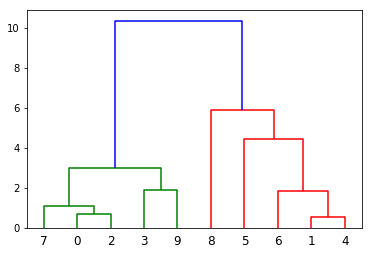

In [14]:
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
# minkowski 该距离最常用的 p 是 2 和 1, 前者是欧几里得距离（Euclidean distance），后者是曼哈顿距离（Manhattan distance）。
disMat = sch.distance.pdist(x_scaled,'minkowski',2) 
#进行层次聚类:
Z=sch.linkage(disMat,method='ward') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.png
P=sch.dendrogram(Z)
# plt.show()
# plt.savefig('plot_dendrogram1.png')

# 2、K-means聚类

In [15]:
import numpy as np
from sklearn import cluster
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
iris = pd.read_csv('data/iris.csv')
x=iris.ix[:,"Sepal.Length":"Petal.Width"]
y=iris["Species"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


归一化的使用说明 http://www.cnblogs.com/chaosimple/p/4153167.html

In [18]:
x_scaled = preprocessing.scale(x+0.0)#标准化，但是只能用于浮点类型变量
pd.DataFrame(x_scaled).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [55]:
x_scaled

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [75]:
pca=PCA(n_components=2)
newData=pca.fit_transform(x_scaled)
pca.explained_variance_ratio_ 

array([0.72962445, 0.22850762])

In [76]:
score=pd.DataFrame(newData)
score.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [77]:
from sklearn.cluster import KMeans

In [78]:
# n_clusters：要分成的簇数也是要生成的质心数
kmeans = KMeans(n_clusters=4) #MiniBatchKMeans()分批处理
#kmeans = cluster.KMeans(n_clusters=3, init='random', n_init=1)
result=kmeans.fit(x_scaled)
print(result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [79]:
result.labels_ 

array([0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

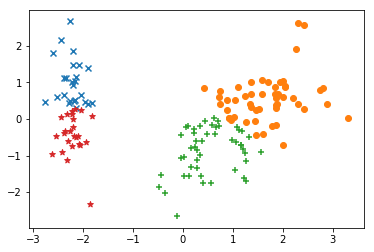

In [80]:
lo = plt.scatter(score[0][result.labels_==0],score[1][result.labels_==0], marker='x')
lo = plt.scatter(score[0][result.labels_==1],score[1][result.labels_==1], marker='o')
lo = plt.scatter(score[0][result.labels_==2],score[1][result.labels_==2], marker='+')
lo = plt.scatter(score[0][result.labels_==3],score[1][result.labels_==3], marker='*')

In [81]:
from sklearn import metrics
metrics.silhouette_score(x_scaled, result.labels_, metric='euclidean')

0.38193193551552046

In [82]:
x_scaled = preprocessing.scale(x+0.0)#标准化，但是只能用于浮点类型变量
x_scaled=pd.DataFrame(x_scaled)
kmeans = KMeans(n_clusters=2) #MiniBatchKMeans()分批处理
#kmeans = cluster.KMeans(n_clusters=3, init='random', n_init=1)
result=kmeans.fit(x_scaled)
print(result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [83]:
result.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [86]:
#x_scaled

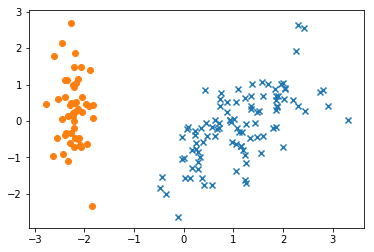

In [85]:
lo = plt.scatter(score[0][result.labels_==0],score[1][result.labels_==0], marker='x')
lo = plt.scatter(score[0][result.labels_==1],score[1][result.labels_==1], marker='o')

In [54]:
from sklearn import metrics
metrics.silhouette_score(x_scaled, result.labels_, metric='euclidean')

0.5817500491982808

## 聚类效果评估

### Silhouette Coefficient

http://scikit-learn.org/stable/modules/clustering.html#clustering

In [ ]:
from sklearn import metrics
metrics.silhouette_score(x_scaled, result.labels_, metric='euclidean')

### Adjusted Rand index

http://scikit-learn.org/stable/modules/clustering.html#clustering

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(y, result.labels_ )

## 练习